#2-1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://drive.google.com/file/d/1jYW2zOSeXrdsVjhE4Q6G00ycijek8xPm/view?usp=sharing
https://drive.google.com/file/d/1PulhFyTnR1H5XlUqDvjSAO5Y8_YcCakC/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1jYW2zOSeXrdsVjhE4Q6G00ycijek8xPm
!gdown 1PulhFyTnR1H5XlUqDvjSAO5Y8_YcCakC

Downloading...
From: https://drive.google.com/uc?id=1jYW2zOSeXrdsVjhE4Q6G00ycijek8xPm
To: /content/Normal.csv
100% 6.14M/6.14M [00:00<00:00, 46.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PulhFyTnR1H5XlUqDvjSAO5Y8_YcCakC
To: /content/Fault.csv
100% 4.70M/4.70M [00:00<00:00, 36.5MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
Normal = pd.read_csv('/content/Normal.csv')

Normal=Normal.X097_DE_time
# Show the number of null values in each column
null_counts = Normal.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# Remove rows with null values
Normal = Normal.dropna()

# Reset the index after removing rows
Normal = Normal.reset_index(drop=True)

# Now, the DataFrame 'df' contains no rows with null values
print("DataFrame after removing rows with null values:")
print(Normal)


Number of null values in each column:
0
DataFrame after removing rows with null values:
0         0.053197
1         0.088662
2         0.099718
3         0.058621
4        -0.004590
            ...   
243933   -0.059664
243934   -0.063836
243935   -0.034630
243936    0.016689
243937    0.046938
Name: X097_DE_time, Length: 243938, dtype: float64


In [ ]:
Fault = pd.read_csv('/content/Fault.csv')
Fault=Fault.X105_DE_time
# Show the number of null values in each column
null_counts = Fault.isnull().sum()
print("Number of null values in each column:")
print(null_counts)

# Remove rows with null values
Fault = Fault.dropna()

# Reset the index after removing rows
Fault = Fault.reset_index(drop=True)

# Now, the DataFrame 'df' contains no rows with null values
print("DataFrame after removing rows with null values:")
print(Fault)

Number of null values in each column:
0
DataFrame after removing rows with null values:
0        -0.083004
1        -0.195734
2         0.233419
3         0.103958
4        -0.181115
            ...   
121260    0.324545
121261    0.142456
121262   -0.316424
121263   -0.063675
121264    0.267368
Name: X105_DE_time, Length: 121265, dtype: float64


#2-2

##A

In [ ]:
Normal_data = Normal
Fault_data = Fault

# Extract 100 samples with length of 200
sample_length = 200
num_samples = 100

Normal_samples = []
Fault_samples = []

# Extract samples from class Normal
for i in range(num_samples):
    np.random.seed(64)
    start_idx = np.random.randint(0, len(Normal_data) - sample_length + 1)
    sample = Normal_data[start_idx:start_idx + sample_length]
    Normal_samples.append(sample)

# Extract samples from class Fault
for i in range(num_samples):
    np.random.seed(64)
    start_idx = np.random.randint(0, len(Fault_data) - sample_length + 1)
    sample = Fault_data[start_idx:start_idx + sample_length]
    Fault_samples.append(sample)

# Convert lists of samples to numpy arrays
Normal_samples = np.array(Normal_samples)
Fault_samples = np.array(Fault_samples)

# Create labels for the samples
Normal_labels = np.ones((num_samples, 1))  # Assuming class Normal is labeled as 1
Fault_labels = np.zeros((num_samples, 1))  # Assuming class Fault  is labeled as 0

# Concatenate the data and labels for both classes
data_matrix = np.vstack((Normal_samples, Fault_samples))
print("Data Matrix:")
print(data_matrix)
print(data_matrix.shape)
labels = np.vstack((Normal_labels, Fault_labels))
#print("Labels")
#print(labels)
#print(labels.shape)
main_matrix = np.hstack((data_matrix, labels))
print("data & label matrix:")
print(main_matrix)


Data Matrix:
[[-0.15583569 -0.18483323 -0.15959077 ... -0.08386338 -0.07468431
  -0.06133292]
 [-0.15583569 -0.18483323 -0.15959077 ... -0.08386338 -0.07468431
  -0.06133292]
 [-0.15583569 -0.18483323 -0.15959077 ... -0.08386338 -0.07468431
  -0.06133292]
 ...
 [-0.15691233 -0.6089693   0.27890112 ...  0.03313677 -0.02956319
  -0.11256755]
 [-0.15691233 -0.6089693   0.27890112 ...  0.03313677 -0.02956319
  -0.11256755]
 [-0.15691233 -0.6089693   0.27890112 ...  0.03313677 -0.02956319
  -0.11256755]]
(200, 200)
data & label matrix:
[[-0.15583569 -0.18483323 -0.15959077 ... -0.07468431 -0.06133292
   1.        ]
 [-0.15583569 -0.18483323 -0.15959077 ... -0.07468431 -0.06133292
   1.        ]
 [-0.15583569 -0.18483323 -0.15959077 ... -0.07468431 -0.06133292
   1.        ]
 ...
 [-0.15691233 -0.6089693   0.27890112 ... -0.02956319 -0.11256755
   0.        ]
 [-0.15691233 -0.6089693   0.27890112 ... -0.02956319 -0.11256755
   0.        ]
 [-0.15691233 -0.6089693   0.27890112 ... -0.02956319

##B

In [ ]:
#create features
mean_values = np.mean(data_matrix, axis=1)
std_dev_values = np.std(data_matrix, axis=1)
peak_values = np.max(np.abs(data_matrix), axis=1)
rms_value = np.sqrt(np.mean(data_matrix**2, axis=1))
crest_factor = peak_values / rms_value
peak_to_peak_value=np.max(data_matrix, axis=1)-np.min(data_matrix, axis=1)
Abs_Mean_value=np.mean(np.abs(data_matrix), axis=1)
Impulse_Factor=peak_values/Abs_Mean_value

# Concatenate mean and standard deviation as features
features = np.column_stack((mean_values, std_dev_values, peak_values, rms_value, crest_factor, peak_to_peak_value, Abs_Mean_value, Impulse_Factor))

# Create DataFrame
Data = pd.DataFrame(features, columns=['Mean', 'Standard Deviation','Peak', 'RMS', 'Crest Factor', 'Peak to Peak', 'Absolute Mean', 'Impulse Factor'])

print(Data)


         Mean  Standard Deviation      Peak       RMS  Crest Factor  \
0    0.016739            0.086732  0.202148  0.088333      2.288487   
1    0.016739            0.086732  0.202148  0.088333      2.288487   
2    0.016739            0.086732  0.202148  0.088333      2.288487   
3    0.016739            0.086732  0.202148  0.088333      2.288487   
4    0.016739            0.086732  0.202148  0.088333      2.288487   
..        ...                 ...       ...       ...           ...   
195  0.013727            0.266337  0.902977  0.266690      3.385863   
196  0.013727            0.266337  0.902977  0.266690      3.385863   
197  0.013727            0.266337  0.902977  0.266690      3.385863   
198  0.013727            0.266337  0.902977  0.266690      3.385863   
199  0.013727            0.266337  0.902977  0.266690      3.385863   

     Peak to Peak  Absolute Mean  Impulse Factor  
0        0.386982       0.075379        2.681759  
1        0.386982       0.075379        2.681

##C

In [ ]:
#shuffling Data
Labeled_Data=np.hstack((Data, labels))
np.random.seed(64)
np.random.shuffle(Labeled_Data)
print(Labeled_Data)

[[0.0167393  0.08673215 0.20214831 ... 0.075379   2.68175906 1.        ]
 [0.01372739 0.26633675 0.90297689 ... 0.19650265 4.59524026 0.        ]
 [0.0167393  0.08673215 0.20214831 ... 0.075379   2.68175906 1.        ]
 ...
 [0.01372739 0.26633675 0.90297689 ... 0.19650265 4.59524026 0.        ]
 [0.01372739 0.26633675 0.90297689 ... 0.19650265 4.59524026 0.        ]
 [0.01372739 0.26633675 0.90297689 ... 0.19650265 4.59524026 0.        ]]


In [ ]:
#Train & Test

from sklearn.model_selection import train_test_split
Labeled_Data=pd.DataFrame(np.hstack((Data, labels)), columns=['Mean', 'Standard Deviation','Peak', 'RMS', 'Crest Factor', 'Peak to Peak', 'Absolute Mean', 'Impulse Factor', 'Target'])
X = Labeled_Data[['Mean', 'Standard Deviation','Peak', 'RMS', 'Crest Factor', 'Peak to Peak', 'Absolute Mean', 'Impulse Factor']].values
y = Labeled_Data[['Target']].values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160, 8), (40, 8), (160, 1), (40, 1))

##D

In [ ]:
#Normalizing Data
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
x_train_normalized = scaler.fit_transform(x_train)

# Transform the test data using the same scaler
x_test_normalized = scaler.fit_transform(x_test)

# Check the shapes of the normalized data
x_train_normalized.shape, x_test_normalized.shape, y_train.shape, y_test.shape

((160, 8), (40, 8), (160, 1), (40, 1))

#2-3

In [ ]:
#Logistic Regression (from Scratch)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logistic_regression(x, w):
    y_hat = sigmoid(x @ w)
    return y_hat


#Binary Cross Entropy (BCE)


def bce(y, y_hat):
    loss = -(np.mean(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))
    return loss


#Gradient


def gradient(x, y, y_hat):
    grads = (x.T @ (y_hat - y)) / len(y)
    return grads


#Gradient Descent

def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

#Accuracy

def accuracy(y, y_hat):
    acc = np.sum(y == np.round(y_hat)) / len(y)
    return acc
#recall
def recall(y, y_hat):
    # Calculate true positives and false negatives
    true_positives = np.sum(np.round(y_hat)==y)
    false_negatives = np.sum(np.round(y_hat)!=y)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) != 0 else 0
    return recall




In [ ]:
#hyper parameter
m = 8
np.random.seed(64)
w = np.random.randn(m+1, 1)
print(w.shape)

eta = 0.01
n_epochs = 1000

(9, 1)


In [ ]:
x_train = np.hstack((np.ones((len(x_train), 1)), x_train))
x_train.shape

(160, 9)

In [ ]:
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = logistic_regression(x_train, w)

    # loss
    e = bce(y_train, y_hat)
    error_hist.append(e)

    # gradients
    grads = gradient(x_train, y_train, y_hat)

    # gradient descent
    w = gradient_descent(w, eta, grads)

    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')


Epoch=99, 	 E=0.5278,	 w=[ 1.56372685 -1.97484919 -1.11131983  2.28166698 -1.86175486  0.61888444
 -0.96533571 -0.99921545 -1.14266969]
Epoch=199, 	 E=0.3995,	 w=[ 1.68805554 -1.97244935 -1.11953881  2.23265174 -1.86964291  0.78730601
 -1.05394603 -1.00265863 -1.01169753]
Epoch=299, 	 E=0.3704,	 w=[ 1.76776299 -1.97075896 -1.13386304  2.16589464 -1.88369211  0.8399557
 -1.17590615 -1.01097269 -1.02420188]
Epoch=399, 	 E=0.3446,	 w=[ 1.84254474 -1.96917144 -1.14739715  2.10289198 -1.89696752  0.8887709
 -1.29101353 -1.01883708 -1.03694638]
Epoch=499, 	 E=0.3216,	 w=[ 1.91305782 -1.96767439 -1.16016737  2.04345184 -1.90949374  0.93474677
 -1.39961265 -1.02625839 -1.04905561]
Epoch=599, 	 E=0.3011,	 w=[ 1.97967526 -1.96625993 -1.17223879  1.98726936 -1.92133461  0.97814153
 -1.50226037 -1.03327423 -1.06056746]
Epoch=699, 	 E=0.2827,	 w=[ 2.04273213 -1.96492098 -1.18367062  1.93406787 -1.93254816  1.0191827
 -1.59946207 -1.03991887 -1.0715237 ]
Epoch=799, 	 E=0.2662,	 w=[ 2.10252988 -1.963

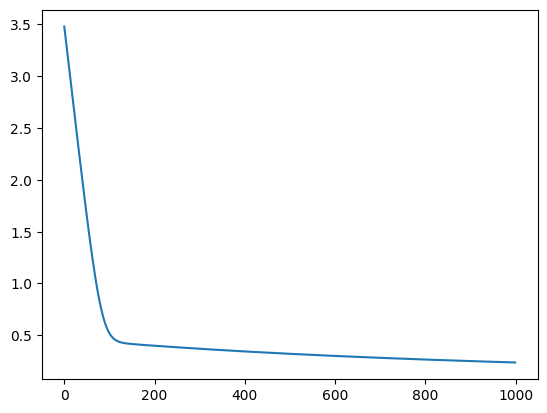

In [ ]:
plt.plot(error_hist)


In [ ]:
#Test
x_test = np.hstack((np.ones((len(x_test), 1)), x_test))
x_test.shape

(40, 9)

In [ ]:
#Accuracy
y_hat = logistic_regression(x_test, w)
accuracy(y_test, y_hat)

1.0

In [ ]:
#Accuracy
recall(y_test, y_hat)

1.0

#2-4

In [ ]:
#LogisticRegression_using libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier
model = LogisticRegression(random_state=64)
model.fit(x_train, y_train)
model.predict(x_test), y_test


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 0., 0., 0., 1., 0.]),
 array([[1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.]]))

In [ ]:
model.predict_proba(x_test)

array([[0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.01406946, 0.98593054],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.98444956, 0.01555044],
       [0.

In [ ]:
model.predict_log_proba(x_test)

array([[-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-0.01567261, -4.16366659],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-0.01567261, -4.16366659],
       [-0.01567261, -4.16366659],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-4.26374884, -0.01416937],
       [-0.01567261, -4.16366659],
       [-0.01567261,

In [ ]:
model.score(x_train, y_train)

1.0

In [ ]:
model.score(x_test, y_test)

1.0

In [ ]:
#optimize hyperparameter using random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform

# Set the random seed
np.random.seed(64)
# Define hyperparameter distributions
param_dist = {
    'max_iter': randint(100, 1000),
    'C': [0.1, 1, 10],
    'class_weight': [{0: w, 1: 1 - w} for w in uniform(loc=0, scale=1).rvs(10)],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

# Perform random search
random_search = RandomizedSearchCV(model, param_dist, scoring='accuracy',random_state=64)
random_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Hyperparameters: {'C': 0.1, 'class_weight': {0: 0.3133373611975704, 1: 0.6866626388024296}, 'max_iter': 219, 'solver': 'newton-cg'}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#LogisticRegression after hyperparameter optimization
from sklearn.linear_model import LogisticRegression
# Define class weights
class_weights = {0: 0.3133373611975704, 1: 0.6866626388024296}
# Initialize the Logistic Regression model with class weights
NEW_model = LogisticRegression(solver='newton-cg', max_iter=219, class_weight=class_weights, C=0.1, random_state=64)
# Fit the model
NEW_model.fit(x_train, y_train)
# Make predictions
NEW_model.predict(x_test)
# Compare predictions with true labels
NEW_model.predict(x_test), y_test
NEW_model.score(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
NEW_model.score(x_test, y_test)

1.0

In [ ]:
#SGDClassifier
SGDmodel = SGDClassifier(loss='log_loss', random_state=64)
SGDmodel.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log_loss', random_state=64)

In [ ]:
SGDmodel.score(x_train, y_train)

1.0

In [ ]:
SGDmodel.score(x_test, y_test)

1.0

In [ ]:
#optimize hyperparameter using random search
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter
np.random.seed(64)
param_dist = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 10],  # Regularization parameter
    'max_iter': randint(100, 1000),       # Maximum number of iterations
    'learning_rate': ['optimal', 'constant', 'adaptive'],  # Learning rate schedule
    'eta0' :[0.99, 0.95, 0.91, 0.87, 0.83] #initial learning rate
    }

# Perform random search
random_search = RandomizedSearchCV(SGDmodel, param_dist, scoring='accuracy',random_state=64)
random_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Hyperparameters: {'alpha': 10, 'eta0': 0.95, 'learning_rate': 'optimal', 'max_iter': 919}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
NEW_SGDmodel = SGDClassifier(loss='log_loss', alpha=10, max_iter=919, random_state=64, learning_rate='optimal', eta0=0.95)
NEW_SGDmodel.fit(x_train, y_train)
NEW_SGDmodel.score(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [ ]:
NEW_SGDmodel.score(x_test, y_test)

1.0

Epoch=99, 	 E=0.6931,	 w=[ 2.21340427 -1.96129652 -1.214637    1.78997482 -1.96292359  1.13011622
 -1.86272865 -1.05792006 -1.10143997]
Epoch=199, 	 E=0.6931,	 w=[ 2.21340427 -1.96129652 -1.214637    1.78997482 -1.96292359  1.13011622
 -1.86272865 -1.05792006 -1.10143997]
Epoch=299, 	 E=0.6931,	 w=[ 2.21340427 -1.96129652 -1.214637    1.78997482 -1.96292359  1.13011622
 -1.86272865 -1.05792006 -1.10143997]
Epoch=399, 	 E=0.6931,	 w=[ 2.21340427 -1.96129652 -1.214637    1.78997482 -1.96292359  1.13011622
 -1.86272865 -1.05792006 -1.10143997]
Epoch=499, 	 E=0.6931,	 w=[ 2.21340427 -1.96129652 -1.214637    1.78997482 -1.96292359  1.13011622
 -1.86272865 -1.05792006 -1.10143997]
Epoch=599, 	 E=0.6931,	 w=[ 2.21340427 -1.96129652 -1.214637    1.78997482 -1.96292359  1.13011622
 -1.86272865 -1.05792006 -1.10143997]
Epoch=699, 	 E=0.6931,	 w=[ 2.21340427 -1.96129652 -1.214637    1.78997482 -1.96292359  1.13011622
 -1.86272865 -1.05792006 -1.10143997]
Epoch=799, 	 E=0.6931,	 w=[ 2.21340427 -1.

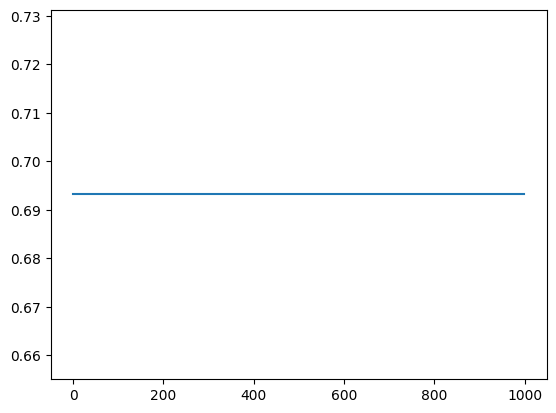

In [ ]:
from sklearn.metrics import log_loss
error_hist = []

for epoch in range(n_epochs):
    # predictions
    y_hat = model.predict_log_proba(x_test)
    # loss
    e = log_loss(y_test, y_hat)
    error_hist.append(e)

    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t E={e:.4},\t w={w.T[0]}')

plt.plot(error_hist)
